In [4]:
import os
import time 
import json
import requests
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv
load_dotenv()
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score




In [5]:
df1 = pd.read_csv("data/ram-test.csv")
df2 = pd.read_csv("data/ram-test2.csv")
df3 = pd.read_csv("data/ram-test3.csv")



In [6]:
df = pd.concat([df1, df2], ignore_index=True)


In [7]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df

,loudness,num_samples,tempo,tempo_confidence,key,key_confidence,duration,mode,mode_confidence,song_id
0,-8.204,5243490,140.874,0.896,11,0.484,237.80000,0,0.577,186hvCTyrni4KT9nwIQ7zS
1,-5.195,6969951,123.003,0.786,2,0.418,316.09756,0,0.435,00o3A1lw52kN47JWV9z4LI
2,-7.303,6868354,118.990,0.762,4,0.202,311.49000,1,0.075,4OF8TKZl9aMlZ449eBrkna
3,-7.089,8702464,124.984,0.646,7,0.266,394.66956,1,0.303,2Y0Sb7do7pOAT9sYAPpCfU
4,-7.148,6446538,152.028,0.862,9,0.713,292.36000,1,0.581,6iqBiGFvgWvSwPCZNsacZE
...,...,...,...,...,...,...,...,...,...,...
195,-5.783,5813850,125.018,0.713,7,0.579,263.66666,1,0.715,4Rnqj368aw5o9hdVHqAnBi
196,-7.335,8443805,121.000,0.835,9,0.348,382.93900,1,0.359,3s7oUJmDGCWmHvRe10E6mM
197,-5.884,9537992,121.993,0.953,0,0.702,432.56200,1,0.338,4ZjGfoT6BmECqoqXNg1g78
198,-6.506,9394411,118.992,0.907,6,0.322,426.05038,1,0.423,6kUoZagkzkhL8TgbuUiLzM


In [8]:
features = df.drop(columns=['song_id'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)


In [9]:
k = 3  # Number of nearest neighbors to consider
knn_model = NearestNeighbors(n_neighbors=k)
knn_model.fit(df_scaled)

NearestNeighbors(n_neighbors=3)

/Users/ramsesmr/miniconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


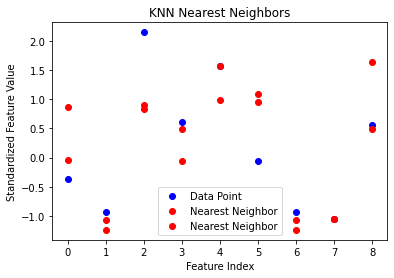

In [10]:
data_point = df_scaled.iloc[0]  # Choose a data point for visualization
distances, indices = knn_model.kneighbors([data_point])

# Get the nearest neighbor indices
neighbor_indices = indices[0][1:]  # Exclude the first index (itself)

# Prepare the data for visualization
data_point_features = df_scaled.iloc[0].values
neighbor_features = df_scaled.iloc[neighbor_indices].values

# Plot the data point and its nearest neighbors
plt.scatter(range(len(data_point_features)), data_point_features, color='blue', label='Data Point')
for neighbor_feature in neighbor_features:
    plt.scatter(range(len(neighbor_feature)), neighbor_feature, color='red', label='Nearest Neighbor')

# Add labels and title
plt.xlabel('Feature Index')
plt.ylabel('Standardized Feature Value')
plt.title('KNN Nearest Neighbors')

# Add a legend
plt.legend()

# Show the plot
plt.show()


/Users/ramsesmr/miniconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ramsesmr/miniconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ramsesmr/miniconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ramsesmr/miniconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

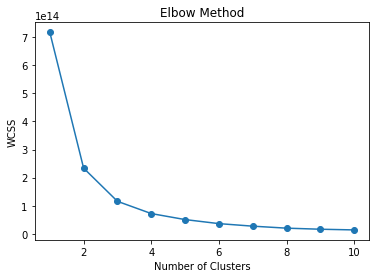

In [11]:
X= features
wcss = []
max_clusters = 10  # Set the maximum number of clusters to consider
for k in range(1, max_clusters + 1):
    model = KMeans(n_clusters=k)
    model.fit(X)
    wcss.append(model.inertia_)  # Get the WCSS for the current number of clusters

# Plot the WCSS values against the number of clusters
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [12]:
model = KMeans(n_clusters=3)  # Set the desired number of clusters
model.fit(X)
predictions = model.predict(X)


/Users/ramsesmr/miniconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


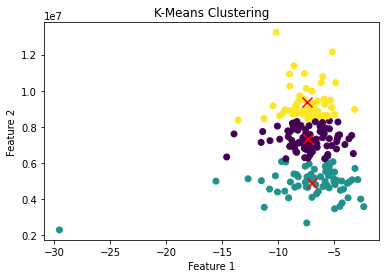

In [13]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=predictions, cmap='viridis')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='x', color='red', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [14]:
df3.drop('Unnamed: 0', inplace=True, axis=1)


In [15]:

input_data = df3
dataset = df

def get_recommendation(index, kmeans_model, dataset, default_value=None):
    if index < 0 or index >= len(dataset):
        # Invalid index, return default value or handle it accordingly
        return default_value
    
    # Get the cluster label for the input data
    input_data = dataset.iloc[[index]]
    input_cluster = kmeans_model.predict(input_data.drop('song_id', axis=1))
    
    # Get the indices of data points in the same cluster as the input data
    cluster_indices = np.where(kmeans_model.labels_ == input_cluster)[0]
    
    if len(cluster_indices) == 0:
        # No data points in the same cluster, return default value or handle it accordingly
        return default_value
    
    # Get the song ID from the dataset that belongs to the same cluster as the input data
    song_id = dataset.iloc[cluster_indices]['song_id'].values[0]
    
    return song_id

In [16]:
k = 3  # Number of clusters
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(dataset.drop('song_id', axis=1))

/Users/ramsesmr/miniconda3/envs/ironhack/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [21]:
index = int(input("Enter number from 0-99: "))
recommendation = get_recommendation(index, kmeans_model, dataset)
print('Recommended Song ID:', recommendation)

Enter number from 0-99: 80
Recommended Song ID: 00o3A1lw52kN47JWV9z4LI


In [23]:
recommendation

'00o3A1lw52kN47JWV9z4LI'

In [25]:
import os
os.system(f"open https://open.spotify.com/track/{recommendation}")

0